Task 1
Aesthetics being used are:

x = income

y = life_exp

size = population

fill = four_regions

In [20]:
import pandas as pd
import plotnine as p9
from plotnine import *

In [21]:
q1 = pd.read_csv("Data/q1data.csv")
q2 = pd.read_csv("Data/q2data.csv")
q3 = pd.read_csv("Data/q3data.csv")


C:\Users\tyler\anaconda3\Lib\site-packages\mizani\transforms.py:374: RuntimeWarning: divide by zero encountered in log10
C:\Users\tyler\anaconda3\Lib\site-packages\plotnine\layer.py:372: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


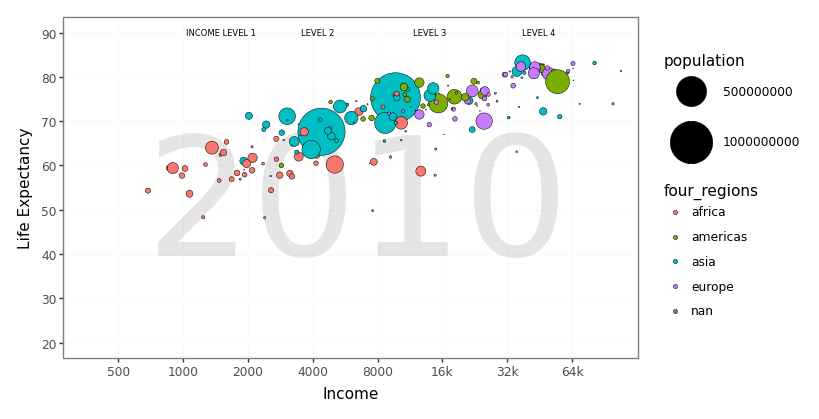

In [22]:
breaks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]
labels = ["500", "1000", "2000", "4000", "8000", "16k", "32k", "64k"]
year_text = str(q1['year'].iloc[0])
(
    ggplot(q1) +
    aes(x="income", y="life_exp", size="population", fill="four_regions")
  + annotate("text", x=6500, y=50, label=year_text, alpha=.1, size=120)
  + geom_point(color="black",stroke=.2)
  + scale_x_log10(
        breaks=breaks,
        labels=labels,
        limits=(0, 130000)
    )
    + scale_y_continuous(breaks=range(20, 100, 10), limits=(20, 90))
    + scale_size_area(max_size=20)
    + labs(x="Income", y="Life Expectancy")
    + theme_bw()
    + theme(figure_size=(8, 4))
    + theme(panel_grid_major=element_line(color="#FAFAFA"),
        panel_grid_minor=element_blank())


    + annotate("text", x= 1500, y=90, label="INCOME LEVEL 1", size=6, ha="center")
    + annotate("text", x=4200, y=90, label="LEVEL 2", size=6, ha="center")
    + annotate("text", x=14000, y=90, label="LEVEL 3", size=6, ha="center")
    + annotate("text", x=45000, y=90, label="LEVEL 4", size=6, ha="center")

)

In [23]:
#I asked chatGPT on how I would add things like a watermark to a graph and it taught me the annotate function which I later used to make the category labesl.
# I also needed help making the 2010 pulled from the data and not just text that says "2010"

You can use geom_boxplot. it's able to summarize central tendency and spread by region at a glance. However,it hides country-level points and the income dimension entirely, you can’t see how income relates to life expectancy. And there is no way to show population size.

C:\Users\tyler\anaconda3\Lib\site-packages\plotnine\layer.py:293: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.


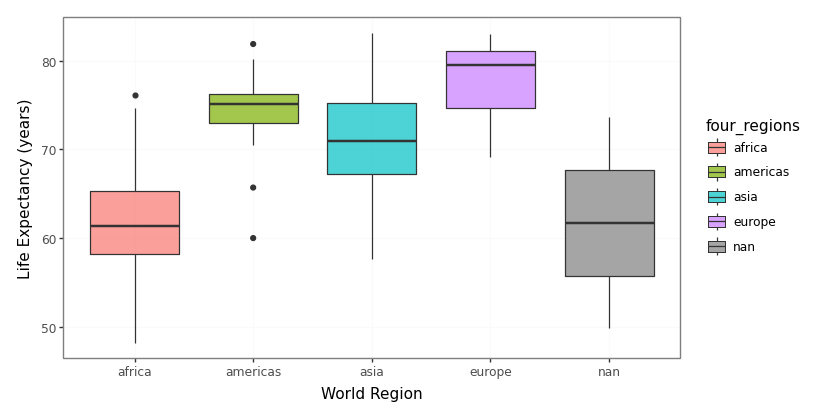

In [24]:
(
    ggplot(q1) +
    aes(x="four_regions", y="life_exp", fill="four_regions")
    + geom_boxplot(alpha=0.7)
    + labs(x="World Region", y="Life Expectancy (years)")
    + theme_bw()
    + theme(figure_size=(8, 4))
    + theme(panel_grid_major=element_line(color="#FAFAFA"),
            panel_grid_minor=element_blank())
)

Task 2
Aesthetics being used are

x = exports

y = imports

size = energy (use)

fill = four_regions

In [25]:
q2[["energy"]].dtypes

energy    object
dtype: object

In [26]:
q2["energy"] = pd.to_numeric(q2["energy"], errors='coerce') #chat helped me with my error I kept getting because I didn't realize energy was an object not numeric

C:\Users\tyler\anaconda3\Lib\site-packages\plotnine\layer.py:372: PlotnineWarning: geom_point : Removed 80 rows containing missing values.


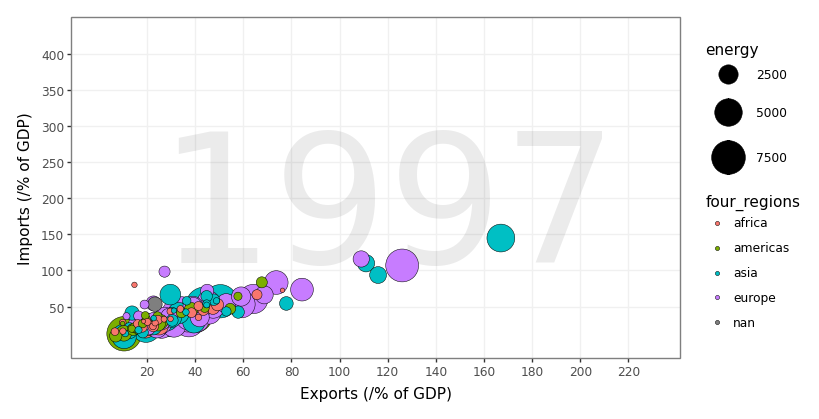

In [27]:
year_text2 = str(q2['year'].iloc[0])
q2 = q2.sort_values("energy", ascending=False) #I kept getting smaller circles hidden by bigger circles so I asked chat what function is used to send bigger data behind smaller data
(
    ggplot(q2, aes(x="exports", y="imports", fill="four_regions", size="energy"))

    + annotate("text", x=120, y=180, label=year_text2, alpha=.08, size=130)
    + geom_point(color="black", stroke=.2)
    + scale_size_area(max_size=15)
    + labs(x="Exports (/% of GDP)", y="Imports (/% of GDP)")
    + scale_x_continuous(breaks=range(20, 240, 20), limits=(0, 230))
    + scale_y_continuous(breaks=range(50, 450, 50), limits=(0, 430))
    + theme_bw()
    + theme(figure_size=(8, 4))
    + theme(panel_grid_major=element_line(color="#F0F0F0"),
        panel_grid_minor=element_blank())


)


You could use a heatmap of Exports vs Imports. A heatmeap would be good for handling overplotting, making dense areas visible, and Good for spotting clusters of countries. It wouldn't be good for losing individual country identity, and there's No way to encode energy or region with bubble size or color.

C:\Users\tyler\anaconda3\Lib\site-packages\plotnine\layer.py:293: PlotnineWarning: stat_bin_2d : Removed 35 rows containing non-finite values.


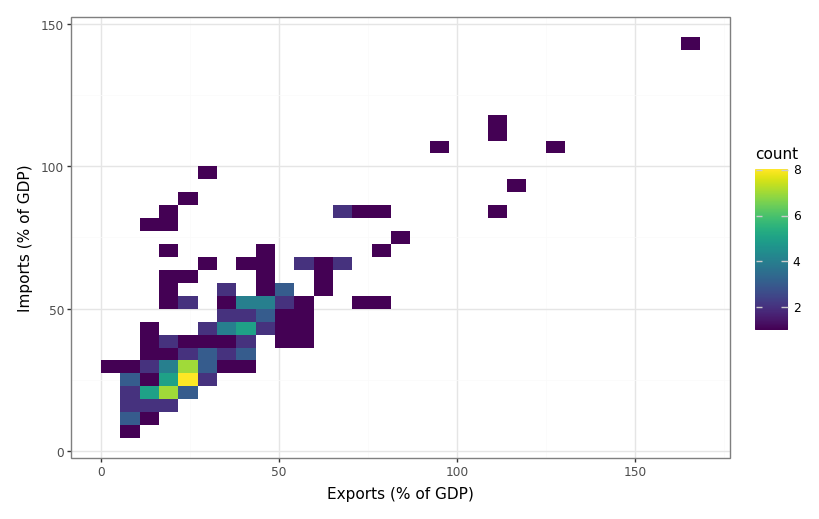

In [28]:
(
    ggplot(q2, aes(x="exports", y="imports"))
    + geom_bin2d(bins=30)
    + labs(x="Exports (% of GDP)", y="Imports (% of GDP)")
    + theme_bw()
    + theme(figure_size=(8, 5))
)

Task 3
aesthetics being used are

x = internet_users

y = GDP

size = income

fill = four_regions

In [ ]:
breaks = [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
labels = ["200", "500", "1000", "2000", "5000", "10k", "20k", "50k", "100k"]
year_text3 = str(q3['year'].iloc[0])

(
    ggplot(q3, aes(x="internet_users", y="gdp", fill="four_regions", size="income"))

    + annotate("text", x=50, y=3500, label=year_text3, alpha=.08, size=120)

    + geom_point(color="black", stroke=.2)
    + scale_y_log10(
        breaks=breaks,
        labels=labels,
        limits=(0, 250000)
    )
    + scale_x_continuous(breaks=range(10, 100, 10), limits=(0, 100))
    + scale_size_area(max_size=15)
    + labs(x="Individuals using the Internet", y="GDP/capita")
    + theme_bw()
    + theme(figure_size=(8, 4))
    + theme(panel_grid_major=element_line(color="#F0F0F0"))


)



You can use a geom_violin. a violin shows the full distribution shape of GDP per capita in each region.
Wider sections = more countries at that GDP level.
Quartile lines (25%, 50%, 75%) help compare medians and spread. However it loses Internet use (x-axis) and bubble size encoding and it's harder to interpret exact values compared to the bubble plot

C:\Users\tyler\anaconda3\Lib\site-packages\plotnine\layer.py:293: PlotnineWarning: stat_ydensity : Removed 16 rows containing non-finite values.


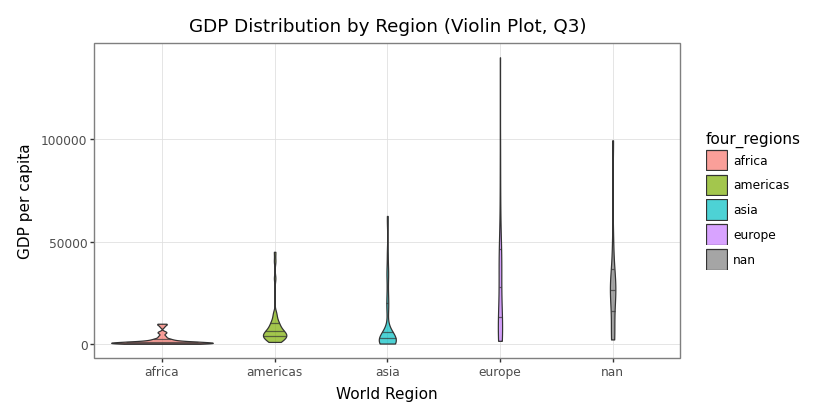

In [ ]:
(
    ggplot(q3, aes(x="four_regions", y="gdp", fill="four_regions"))
    + geom_violin(alpha=0.7, draw_quantiles=[0.25, 0.5, 0.75])  # add quartile lines
    + labs(x="World Region", y="GDP per capita", title="GDP Distribution by Region (Violin Plot, Q3)")
    + theme_bw()
    + theme(
        figure_size=(8, 4),
        panel_grid_major=element_line(color="#E0E0E0", size=0.6),
        panel_grid_minor=element_blank()
    )
)